# Temp Data Analysis


These are essentials for running the program. This Notebook is for analyzing temperature data from RCP8.5 projections.
The csv of data being ran should have year values in the first column headed year. This is essential for the program to run properly.

In [1]:
#initiate Model
using Mimi
using CSV
using DataFrames
using Plots

After initiating the packages we will use we need to open and read the data.

In [2]:
dft85 = CSV.read("updated_projections_temperature_RCP85_sneasybrick.csv", DataFrame)
dft60 = CSV.read("updated_projections_temperature_RCP60_sneasybrick.csv", DataFrame)
dft45 = CSV.read("updated_projections_temperature_RCP45_sneasybrick.csv", DataFrame)
dft26 = CSV.read("updated_projections_temperature_RCP26_sneasybrick.csv", DataFrame)

Row,year,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,⋯
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,1850,0.0234422,-0.045328,0.0385244,-0.107357,0.0267333,-0.0743504,0.0561344,0.00546461,0.180239,0.0987537,0.0632288,0.223078,-0.162058,-0.0725577,0.0580369,0.03719,-0.0383857,-0.218673,-0.32888,-0.362485,-0.237358,-0.268027,-0.044839,0.0463508,-0.0583534,0.258897,0.0138461,-0.309477,-0.240218,-0.145888,-0.0534281,0.202582,0.000363125,-0.110469,0.0719269,0.191516,-0.232001,0.229983,-0.0329747,-0.139433,-0.402763,0.162865,-0.232549,-0.221304,0.154915,0.250539,-0.248329,-0.0404861,-0.0993438,0.0295404,-0.0347151,0.0345884,0.14109,0.085829,-0.194757,-0.0947462,0.0217316,0.00887295,-0.0487506,0.0985525,-0.00100545,0.0548433,-0.303294,0.323773,0.140788,-0.174625,0.0509824,-0.165773,-0.0839018,-0.0951641,0.00204943,-0.178366,0.0518443,0.0475307,-0.0542797,-0.0827367,-0.109304,-0.0740977,-0.228801,0.0192421,-0.0347476,0.265665,0.0570268,-0.020225,0.00625495,0.000777337,-0.0509143,-0.0650644,-0.0735126,-0.0580187,-0.153977,0.0626554,-0.0595186,-0.314793,0.047694,-0.0160849,0.0268826,0.0627847,-0.0995014,⋯
2,1851,0.203431,-0.0591288,-0.0803991,-0.101879,-0.238385,-0.00478281,-0.163292,0.189341,-0.0115764,0.0147026,-0.0149357,0.251164,-0.144849,-0.229711,-0.155586,0.180134,-0.110125,0.0861993,0.0467426,-0.0104919,-0.0354434,0.0180847,-0.0936728,0.148646,-0.370219,-0.0942686,0.182855,-0.196305,-0.200114,0.0284396,-0.108885,0.13273,-0.112269,-0.119908,0.0588021,0.0132033,-0.0604543,-0.188936,0.0714331,-0.222234,0.101529,0.124454,-0.0601339,-0.151931,0.137469,-0.0854907,0.206899,-0.120807,0.115998,0.0800729,0.163359,0.150814,0.241029,-0.0592086,0.248423,-0.187638,-0.0149258,-0.0124899,-0.314464,-0.0109925,-0.0684438,-0.141095,-0.215896,-0.23039,0.0269506,0.0528177,-0.103185,0.108404,-0.0191985,0.0317481,0.118265,0.0252093,0.0633148,-0.260416,-0.0753277,0.233991,-0.0404409,0.122412,-0.207371,0.176251,0.0135784,0.0785713,-0.270521,0.0130804,-0.19568,-0.100718,0.132776,-0.0489084,0.0630374,-0.0890993,-0.12931,0.0186485,0.0346588,-0.0843565,0.125129,0.0691323,-0.102048,0.0382586,0.0229817,⋯
3,1852,0.296572,0.132803,0.0782824,-0.295648,-0.210056,0.174047,-0.0725087,-0.0758201,0.137161,0.0417324,-0.0562208,-0.120973,-0.307207,0.0633756,0.0235371,0.033247,0.1218,0.0641702,-0.253511,-0.153797,-0.173801,-0.106245,-0.0510802,0.11389,0.110666,-0.0061454,0.210473,-0.105489,0.0330758,-0.0493694,0.00530809,0.0156152,0.288399,-0.179627,0.1434,-0.204599,0.0637856,-0.111584,-0.158113,-0.286074,-0.0296376,0.0887429,-0.0788385,-0.280717,0.0884141,0.260771,-0.0417685,-0.0083994,0.244299,-0.00229867,-0.0682065,0.262337,-0.0869021,-0.00104962,0.214028,-0.0349277,0.299938,-0.0619838,-0.0185922,0.0405871,-0.0199232,0.0511049,-0.297778,-0.0271433,-0.113126,0.0554178,0.12991,0.15411,0.0635556,0.0307728,0.0818212,0.0125908,-0.0765288,-0.105543,-0.159444,0.249427,-0.186528,0.0304853,-0.0342

## Primary Run

First we set our index variables.

In [4]:
colr = collect(2:ncol(dft))
rowr = collect(1:nrow(dft))

451-element Vector{Int64}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
   ⋮
 443
 444
 445
 446
 447
 448
 449
 450
 451

Then we solve for when find the rows within the timeframe of the years selected.

In [5]:
#create array list to house all years within the norm period
normp = []
#set normalization period
for r in rowr
    if 1850 <= dft[r,:year] <= 1900
        push!(normp, r)
    end
end 

Next, we index through each temperature of the n ormalization period for each trial and collect their value.

In [6]:
# Set the index and array to solve for normalized value
sarray = []
i = 0

# Add each value to a sum
for r in normp
    for c in colr
        push!(sarray, dft[r, c])
        i += 1
    end
end
sarray[1]

-0.031582453

Next we find the mean.

In [7]:
# Collect the sum
summ = 0
for t in collect(1:i)
    summ += sarray[t]
end
# Divide by the number of terms(i)
avg = summ / i


-0.03030344187909853

Next we noramlize the data for each instance.

In [8]:
# change the value for each instance after the first 50 years
for r in rowr
    for c in colr
        dft[r, c] = (dft[r, c] - avg)
    end
end
dft

Row,year,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,⋯
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,1850,-0.00127901,0.0358651,0.00658736,0.00310391,-0.156565,-0.232298,0.0244832,-0.0778929,0.0253276,0.187936,0.0632288,0.0185737,-0.0477839,-0.12838,0.126856,-0.303417,0.043422,-0.153661,-0.0928713,0.212241,-0.196354,-0.225047,-0.204856,-0.0420353,0.031684,0.00931942,0.189716,-0.268691,-0.155151,0.0266548,-0.230653,-0.120558,-0.0454255,-0.194665,-0.148334,0.011099,0.0124601,0.0374671,0.144434,-0.0242696,0.155668,-0.00620622,0.0560844,-0.345756,-0.104353,-0.138873,0.0125091,-0.172969,0.00882713,0.0746064,-0.00508793,-0.113978,0.189187,-0.144869,0.0290631,-0.112723,-1.69641e-5,-0.0467699,0.021851,-0.124746,0.0946669,-0.0554121,0.101555,-0.00826186,0.0752535,-0.0660762,0.180156,0.267272,-0.00919001,0.138356,0.0346889,0.298325,-0.139498,-0.187392,-0.00310008,-0.012968,-0.0215372,0.0699116,0.000179953,-0.202058,0.16192,-0.115986,0.0887452,0.0447463,0.0350296,-0.161291,0.00736523,-0.0199946,0.0684137,0.0440757,0.125476,-0.0890807,-0.0286312,-0.224802,0.020553,-0.0209601,-0.0906909,0.0683625,0.100629,⋯
2,1851,0.0845733,-0.111099,0.0312623,-0.0815236,-0.102852,-0.00851698,-0.199791,-0.00483495,0.0503991,0.0782521,-0.0363666,0.210851,-0.112583,-0.0849339,-0.114513,-0.0131476,-0.0562172,0.133431,-0.0109924,-0.142479,0.0320473,-0.0733278,-0.125961,-0.150361,-0.106962,0.140841,-0.053501,-0.122074,0.0491877,0.0394288,0.0793141,0.27556,0.107224,0.0494065,-0.0982043,0.0555547,0.129098,-0.0138965,0.213459,0.060228,0.208057,0.187504,0.127109,0.0419113,-0.0592576,0.215255,-0.0760446,-0.0377472,0.0923466,0.12351,0.206616,0.154361,0.106259,0.116615,-0.0417101,-0.138767,0.0250416,-0.162047,0.0281971,0.210899,0.0489131,0.0255471,0.0122194,-0.103204,0.12267,0.222288,-0.0408698,0.100867,-0.237198,-0.226117,0.074668,0.0885353,0.255235,-0.373779,-0.0558185,0.132027,0.192179,-0.058178,0.0238914,-0.132477,-0.0719044,0.0591793,0.356787,0.109591,0.164513,-0.0627123,0.143743,0.0521044,0.0826461,0.139443,0.114011,0.106106,0.18857,-0.108458,0.248456,0.414415,-0.0239451,0.0144482,0.264923,⋯
3,1852,0.0406614,-0.0790225,0.0706668,0.0801665,0.144949,-0.0701197,-0.00965145,-0.130498,0.0736746,0.0512229,-0.0448693,-0.139508,0.0179973,0.0124866,0.190737,-0.228825,0.332906,0.172548,0.0776651,0.00568321,0.0136767,-0.0596782,0.0266632,0.130348,-0.130006,0.0584467,0.119106,0.0620339,0.293425,-0.0430635,0.0297134,0.0797209,0.195181,-0.178338,0.0709624,-0.0117298,0.0854815,0.00846759,0.149486,-0.0128581,0.161684,-0.103063,0.0590124,-0.160905,0.0273115,0.0237913,-0.225469,-0.100487,-0.159032,0.237835,-0.209879,0.099518,0.0564854,-0.0593627,0.15259,0.244781,-0.0603517,-0.0193528,0.283954,0.252759,0.0136159,0.136335,0.0609605,-0.00126869,0.0332318,-0.146745,-0.116449,0.0181442,0.0637925,-0.243152,-0.0983651,0.111741,-0.0729404,-0.0334264,0.108496,0.0887805,0.151247,0.220564,-0.0283644,-0.179567,0.

Now to prep for graphing we create a empty dict to hold all the results each year.

In [9]:
yearVals = Dict{Any, Any}()
print("Dict values = ", yearVals)

Dict values = Dict{Any, Any}()

Next we determine the year 2100 in the df.

In [10]:
#Set year we are looking for and initiate row
yr = 2100
rw = 0
#claculate what row we are looking for
for r in rowr
    if dft[r,:year] == yr
        rw = r
    end
end
rw

251

Now we store all the values from that row into the yearVals Dict

In [11]:
x2100 = []
for c in colr
    push!(x2100, dft[rw, c])
end
x2100

10000-element Vector{Any}:
 4.940058832879099
 3.2554046718790985
 4.472642827879098
 5.492420418879099
 4.192914710879099
 4.1722702778790985
 3.8777005718790987
 3.7875448228790987
 4.631302627879099
 3.8473599688790987
 ⋮
 4.2813712248790985
 3.9148311238790985
 4.829255460879098
 4.228298333879098
 3.7357581708790986
 4.682069538879099
 4.410863731879099
 4.9634468988790985
 5.348214252879099

Make the histogram.

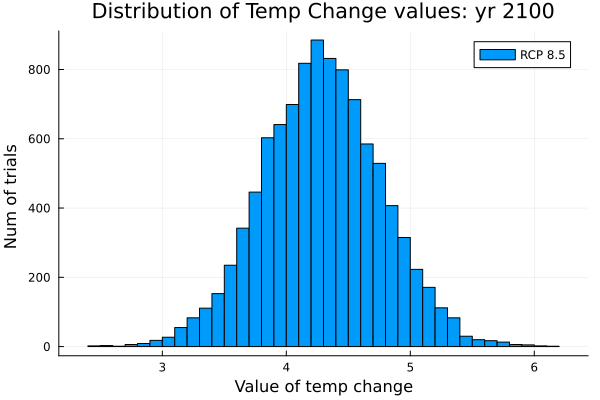

In [12]:

histogram(x2100, label = "RCP 8.5")
title!("Distribution of Temp Change values: yr 2100")
xlabel!("Value of temp change")
ylabel!("Num of trials ")
     

## Generalization of Primary

general function to do all of this.

In [3]:
function genp(dft, yr)
    #set boundaries
    colr = collect(2:ncol(dft))
    rowr = collect(1:nrow(dft))

    #create array list to house all years within the norm period
    normp = []
    #set normalization period
    for r in rowr
        if 1850 <= dft[r,:year] <= 1900
            push!(normp, r)
        end
    end
    
    # Set the index and array to solve for normalized value
    sarray = []
    i = 0

    # Add each value to a sum
    for r in normp
        for c in colr
            push!(sarray, dft[r, c])
            i += 1
        end
    end

    # Collect the sum
    summ = 0
    for t in collect(1:i)
        summ += sarray[t]
    end
    # Divide by the number of terms(i)
    avg = summ / i

    # change the value for each instance after the first 50 years
    for r in rowr
        for c in colr
            dft[r, c] = (dft[r, c] - avg)
        end
    end

    #initiate row
    rw = 0
    #claculate what row we are looking for
    for r in rowr
        if dft[r,:year] == yr
            rw = r
        end
    end

    x = []
    for c in colr
        push!(x, dft[rw, c])
    end

    return x
end

genp (generic function with 1 method)

run function with different rcps for same year, create variable to house result.

In [10]:
r85 = genp(dft85, 2100)
r60 = genp(dft60, 2100)
r45 = genp(dft45, 2100)
r26 = genp(dft26, 2100)
r26


1.6244138841497142

Create a gen function for historgrams

In [26]:
function histg(data, rcp, tyear)
    darray = []
    #initiate hist array
    for t in collect(1:length(data))
        push!(darray, data[t])
    end

    #make histogram
    histogram(darray, label = string("RCP ",rcp))
    title!(string("Distribution of Temp Change values: yr ",tyear))
    xlabel!("Value of temp change")
    ylabel!("Num of trials ")
end

histg (generic function with 1 method)

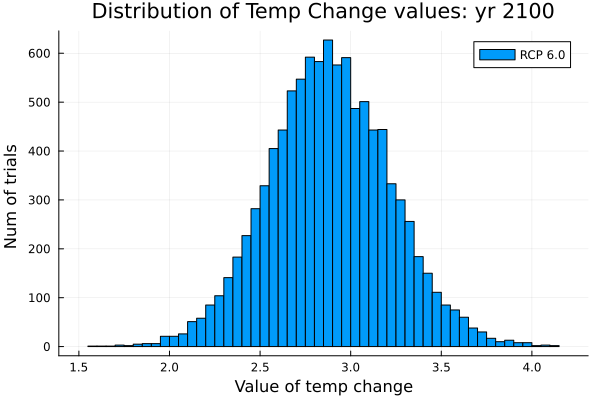

In [28]:
histg(r60, 6.0, 2100)